# **Project Name**    - **Retail Sales Prediction** 



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1** - **Siddharth Ray**


# **Project Summary**

**The Retail Sales prediction capstone project is provided with two CSV files that is Rossmann Stores Data and Store that consists of 19 variables which contains different kinds of information.**

**A) Initially, data cleaning and wrangling were conducted to combine two datasets. Then, the Exploratory Data Analysis (EDA) was performed by creating various visualization charts to analyze the data. During the EDA, some interesting findings were discovered such as the high correlation between sales and customers, more sales on Mondays due to store closures on Sundays, promotions leading to more sales, stores staying open more frequently during school holidays and generating more sales compared to state holidays, store type 'a' having the highest sales on average, Assortment level-b (i.e., 'extra') resulting in the highest average sales, school holidays affecting only 17.9% of sales, and so on.**

**B) In the second step I did hypothesis testing:**

**1. Hypothesis:** Stores located closer to competition have significantly lower sales than stores located further away

**2. Null hypothesis:** There is no significant difference in sales between stores closer to the competition and farther away.

**3. Alternative hypothesis:** Stores closer to competition have significantly lower sales than stores farther away.

**To test this hypothesis, I performed a two-sample t-test between the sales of stores located within 10 km of competition and
stores located further away. We can set a significance level of 0.05**

**C) In the third step I performed feature engineering like filling missing values, handling null values, handling columns, deleting unnecessary columns, feature processing, feature extracting, outliers handling and feature selection.**

**D) The last but not the least step, of my project is "model deployment". I have deployed two models, first one is the "linear regression model" and the second one is the "lasso regression model".** 

#**Conclusion of both the models:**

**The evaluation of regression models often uses two metrics: MSE and R2 score. Both Linear Regression and Lasso Regression models have similar performance, with Linear Regression slightly outperforming Lasso Regression in terms of MSE and R2 score. MSE is a measure of the average difference between predicted and actual values, where lower MSE implies better performance. R2 score measures how much of the dependent variable's variance can be explained by independent variables and a higher R2 score indicates a better fit of the linear regression model.**

# **GitHub Link -**

https://github.com/Siddharth-94/Retail-Sales-Prediction.git

# **Problem Statement**


**Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.**

 **You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoLars
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

### Dataset Loading

In [ ]:
# Load Dataset

# Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading Rossmann Dataset 
rossmann_df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/Regression/Rossmann Stores Data.csv', low_memory= False)

In [ ]:
# Loading Store Dataset
store_df = pd.read_csv('/content/drive/MyDrive/Capstone Projects/Regression/store.csv', low_memory= False)

### Dataset First View

**Rossmann Dataset**

In [ ]:
# First Look

# Checking the first 5 rows of data
rossmann_df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Checking the bottom 5 rows of the data 
rossmann_df.tail(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


**Store Dataset**

In [ ]:
# Checking the first 5 rows of data
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
# Checking the bottom 5 rows of the data 
store_df.tail(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count of rossmann dataset
rossmann_df.shape


(1017209, 9)

In [ ]:
# Dataset Rows & Columns count of store dataset
store_df.shape

(1115, 10)

#**Merging of both datasets**

In [ ]:
# Merged the datasets on store data
df = rossmann_df.merge(right = store_df, on = "Store", how = "left")

In [ ]:
# Checking the first 5 rows of the merged dataset
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Information

In [ ]:
# Dataset Info

# Data information. Inspecting each columns and its dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [ ]:
df.shape

(1017209, 18)

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Print the number of duplicate rows
print(f'There are {len(duplicate_rows)} duplicate rows in the data.')

# Find duplicate rows based on a specific column(s)
duplicate_sales = df[df.duplicated(subset=['Sales'])]

# Print the number of duplicate sales
print(f'There are {len(duplicate_sales)} rows with duplicate sales values.')

There are 0 duplicate rows in the data.
There are 995475 rows with duplicate sales values.


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

Text(0.5, 1.0, 'Places of missing values in columns')

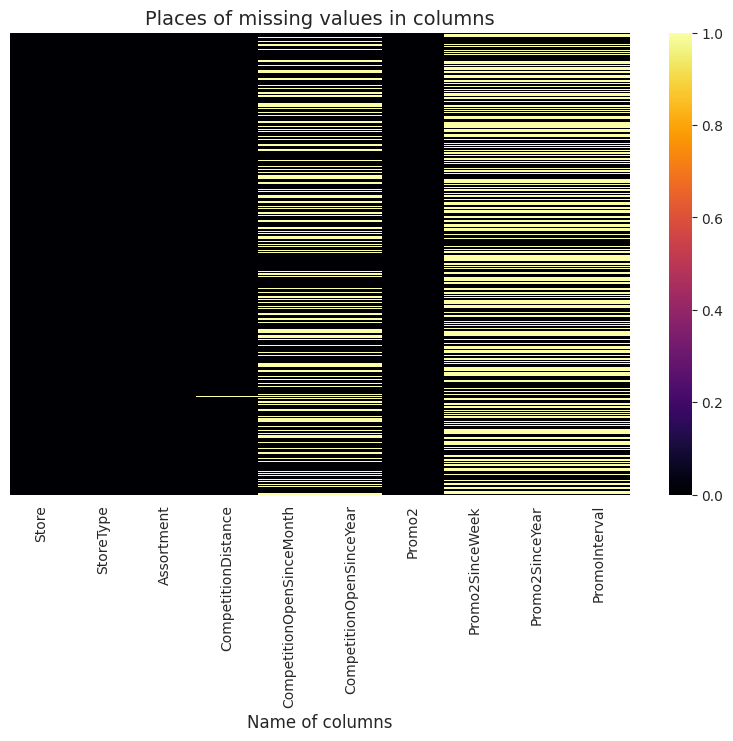

In [ ]:
# Visualizing the missing values
# Creating heatmap for null values
plt.figure(figsize=(10,6))
sns.heatmap(store_df.isnull(), yticklabels = False, cbar = True, cmap = 'inferno')
plt.xlabel("Name of columns", fontsize=12)
plt.title("Places of missing values in columns", fontsize=14)


Text(0.5, 9.444444444444438, 'Competition Distance Distribution Plot')

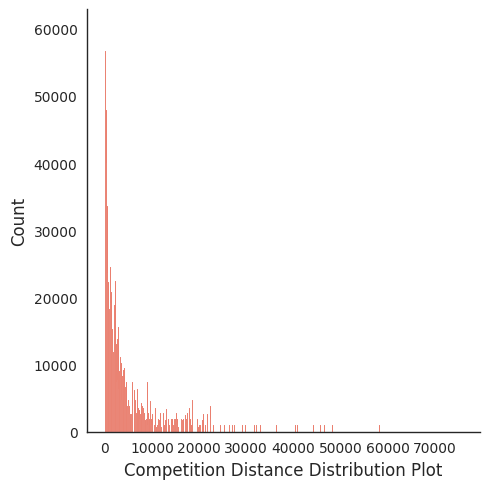

In [ ]:
# Distribution plot of competition distance
sns.displot(x=df['CompetitionDistance'])
plt.xlabel('Competition Distance Distribution Plot')

### What did you know about your dataset?

**A) This project includes two datasets which are rossmann and store.**

**B) There are 1017209 rows and 9 columns in rossmann datset and 1115 rows 9 columns in store dataset.**

**C) After merging both of the datasets we get 1017209 rows and 18 columns.** 

**D) The combined datasets contains 0 duplicated rows and columns but contains duplicated values.** 

**E) Store dataset contains missing values.** 

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [ ]:
# Dataset Describe

# Checking statistical data on numerical columns.
df.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000,509178
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,293122
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000,NaN
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000,NaN
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00,NaN,NaN,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000,NaN


### Variables Description 



A) **Id:**  *An ID that represents a (Store, Date) tuple within the test set.*
 
 B) **Store:**  *A unique ID for each store.*

 C) **Sales:**  *The turnover for any given day (this is what we are predicting)*

 D) **Customers:**  *The number of customers on a given day*

E) **Open:**  *An indicator for whether the store was open or closed (0 = closed, 1 = open).*

F) **StateHoliday:**  *Indicates a state holiday. Normally all stores with few exceptions are closed on state holidays. (We must note that all schools are closed on public holidays and weekends) | a = Public Holiday, b = Easter Holiday, c = Christmas, 0 = None*

G) **SchoolHoliday:**  *Indicates if the (Store, Date) was affected by the closure of public schools.*

H) **StoreType:** *Differentiates between 4 different store models: a, b, c, d*

I) **Assortment:**  *Describes an assortment level: a = basic, b = extra, c = extended*

J) **CompetitionDistance:**  *Distance in meters to the nearest competitor's store.*

K) **CompetitionOpenSince[Month/Year]:**  *Gives the approximate year and month of the time the nearest competitor was opened.*

L) **Promo:** *Indicates whether a store is running a promo on that day.*

M) **Promo2:**  *Promo2 is a continuing and consecutive promotion for some stores (0 = store is not participating, 1 = store is participating)*

N) **Promo2Since[Year/Week]:** *Describes the year and calendar week when the store started participating in Promo2.*

O) **PromoInterval:**  *Describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. Eg: "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store.*

### Check Unique Values for each variable

In [ ]:
# Checking Unique Values for each variable.
for column in df.columns:
    unique_values = df[column].unique()
    print(f'{column}: {unique_values}')

Store: [   1    2    3 ... 1113 1114 1115]
DayOfWeek: [5 4 3 2 1 7 6]
Date: ['2015-07-31' '2015-07-30' '2015-07-29' '2015-07-28' '2015-07-27'
 '2015-07-26' '2015-07-25' '2015-07-24' '2015-07-23' '2015-07-22'
 '2015-07-21' '2015-07-20' '2015-07-19' '2015-07-18' '2015-07-17'
 '2015-07-16' '2015-07-15' '2015-07-14' '2015-07-13' '2015-07-12'
 '2015-07-11' '2015-07-10' '2015-07-09' '2015-07-08' '2015-07-07'
 '2015-07-06' '2015-07-05' '2015-07-04' '2015-07-03' '2015-07-02'
 '2015-07-01' '2015-06-30' '2015-06-29' '2015-06-28' '2015-06-27'
 '2015-06-26' '2015-06-25' '2015-06-24' '2015-06-23' '2015-06-22'
 '2015-06-21' '2015-06-20' '2015-06-19' '2015-06-18' '2015-06-17'
 '2015-06-16' '2015-06-15' '2015-06-14' '2015-06-13' '2015-06-12'
 '2015-06-11' '2015-06-10' '2015-06-09' '2015-06-08' '2015-06-07'
 '2015-06-06' '2015-06-05' '2015-06-04' '2015-06-03' '2015-06-02'
 '2015-06-01' '2015-05-31' '2015-05-30' '2015-05-29' '2015-05-28'
 '2015-05-27' '2015-05-26' '2015-05-25' '2015-05-24' '2015-05-23'


## 3. ***Data Wrangling***

### Data Wrangling Code

#### **Replace missing values in features with low percentages of missing values**

Text(0.5, 1.0, 'Distribution of Store Competition Distance')

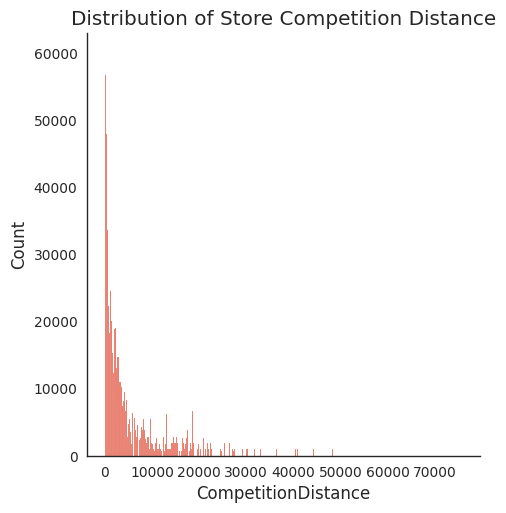

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.displot(df.CompetitionDistance.dropna())
plt.title("Distribution of Store Competition Distance")

In [ ]:
# Replacing missing values in CompetitionDistance with median for the store dataset

df.CompetitionDistance.fillna(df.CompetitionDistance.median(), inplace=True)

In [ ]:
# Creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [ ]:
# Creating features from date
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['WeekOfYear'] = pd.DatetimeIndex(df['Date']).week
df['DayOfYear'] = pd.DatetimeIndex(df['Date']).dayofyear
years = df['Year'].unique()

<ipython-input-11-5e80f6f52eb8>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['WeekOfYear'] = pd.DatetimeIndex(df['Date']).week


### What all manipulations have you done and insights you have found?


  **A) Replaced missing values in features with low percentages of missing values.**

  **B) Replaced missing values in CompetitionDistance with it's median.**

  **C) Created a categorical column list since it is necessary to work with categorical columns.**

  **D) Created features from date column.**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#EDA (Exploratory Data Analysis)

##Chart - 1 | What is the relationship between categorical variables and sales?##

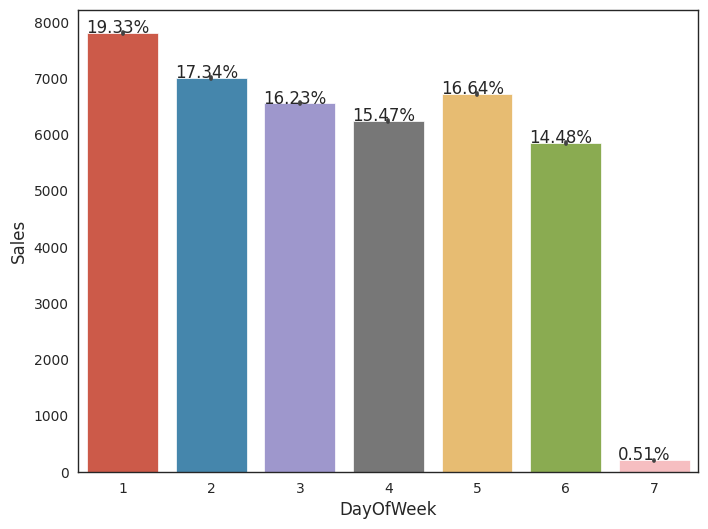

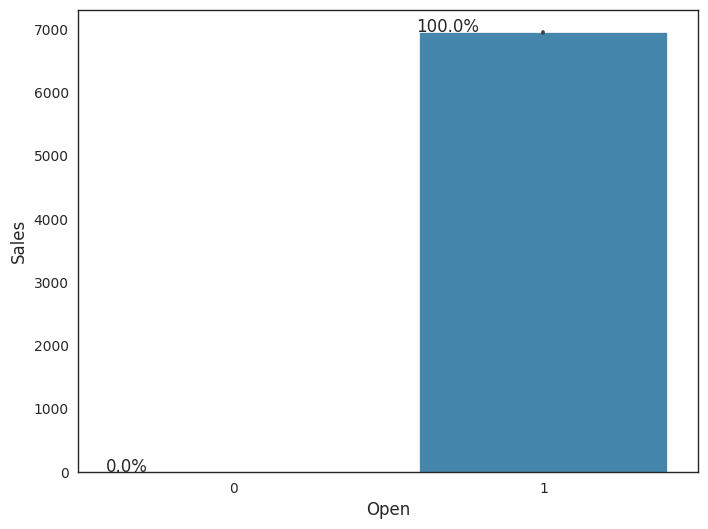

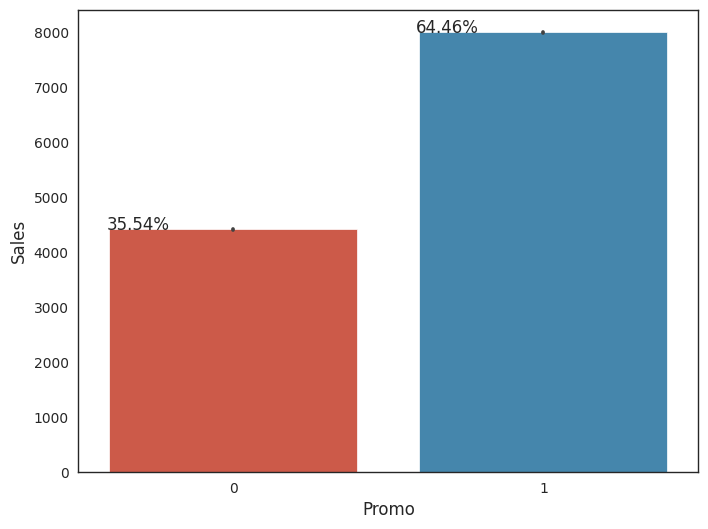

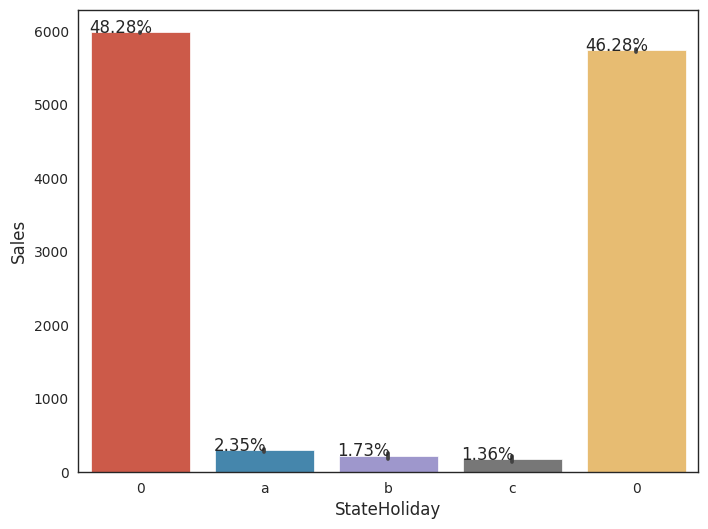

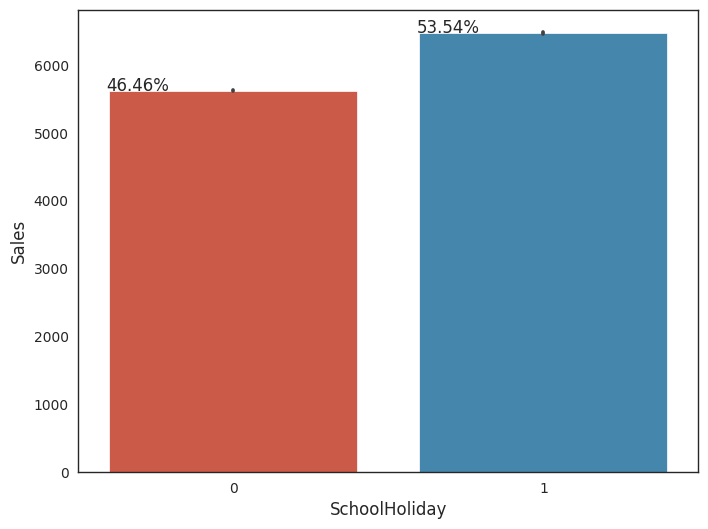

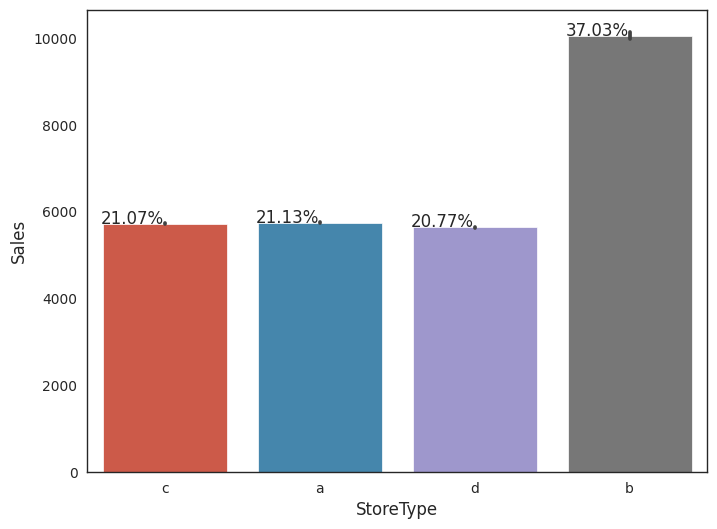

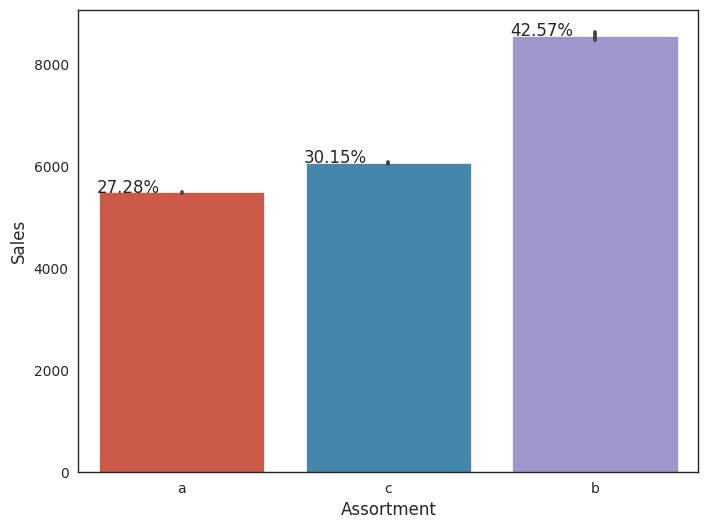

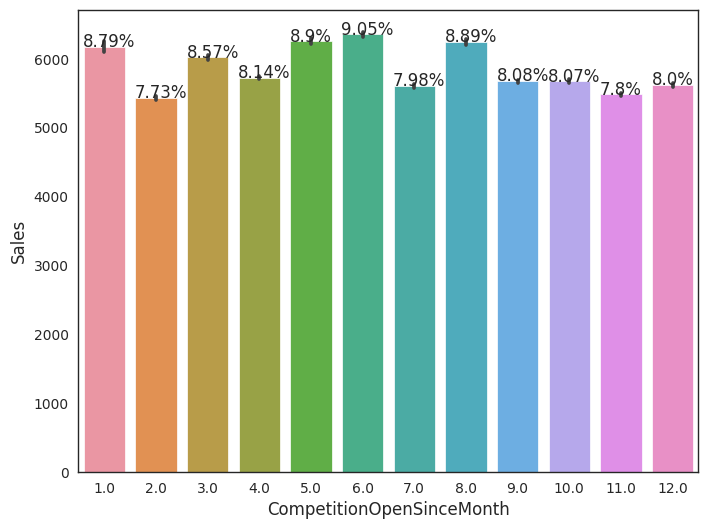

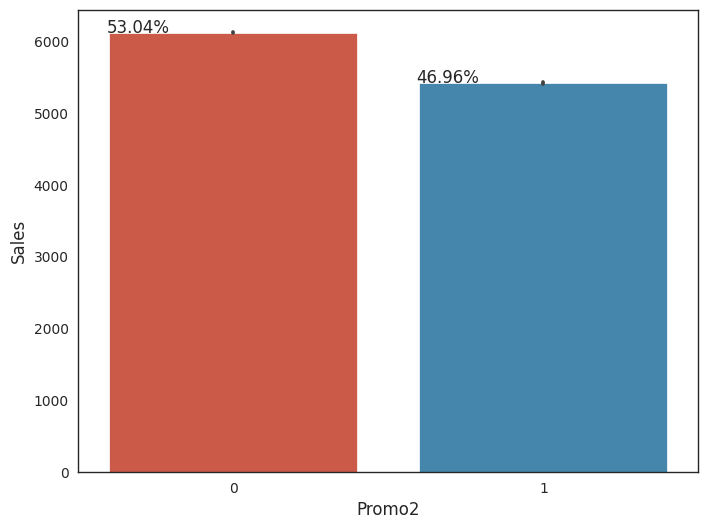

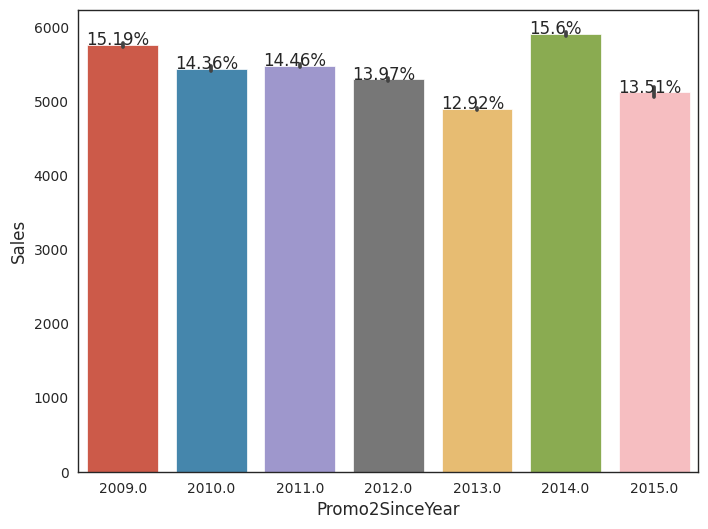

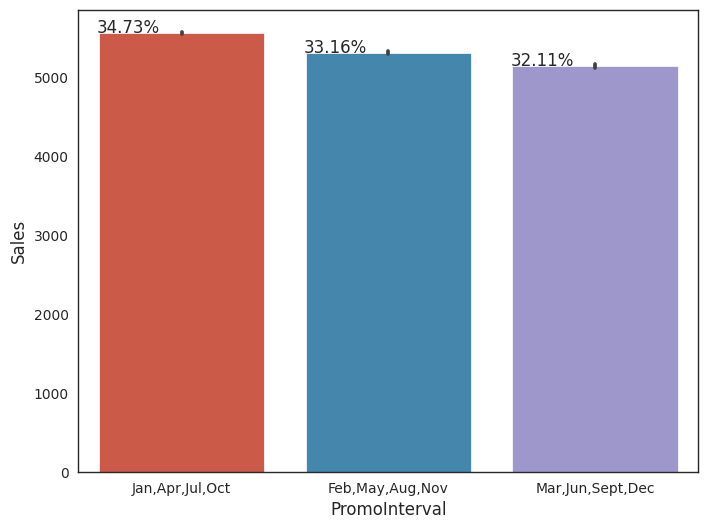

In [ ]:
# Chart - 1 visualization 

# Code for barplots of the categorical variables against sales
# Iterating over the categorical variables and plotting each of them
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'Promo2','Promo2SinceYear','PromoInterval']
for value in categorical_variables:
  ax = sns.barplot(x=df[value], y=df['Sales']) 
  totals = []
  for i in ax.patches: # for every patch in the barplot ax
      totals.append(i.get_height()) # append height for each patch

  total = sum(totals) # sum of each patch height for a plot

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  # text position and formula for percentage
  plt.show()

##### 1. Why did you pick the specific chart?

**A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.**

##### 2. What is/are the insight(s) found from the chart?

###**Observations:**
A) There were more sales on Monday, probably because shops generally remain closed on Sundays.

B) It could be seen that Promo lead to more sales.

C) Normally all stores, with few exceptions, are closed on state holidays. (We can note that all schools are closed on public holidays and weekends. a = Public Holiday, b = Easter Holiday, c = Christmas, 0 = None. The lowest Sales were seen on state holidays, especially on Christmas.)

D) More stores were open on School Holidays than on State Holidays and hence had more sales than on State Holidays.

E) On average store type B had the highest sales.

F) Highest average sales were seen with Assortment levels-b which is 'extra'.

G) With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in the promo.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

* Yes, it is imperative to know what impact do categorical variables have on sales. 

* We gained some insights such as fewer sales on state holidays and if the promo is not used, we saw fewer sales.



##Chart - 2 | Did school holiday affect sales or not?##

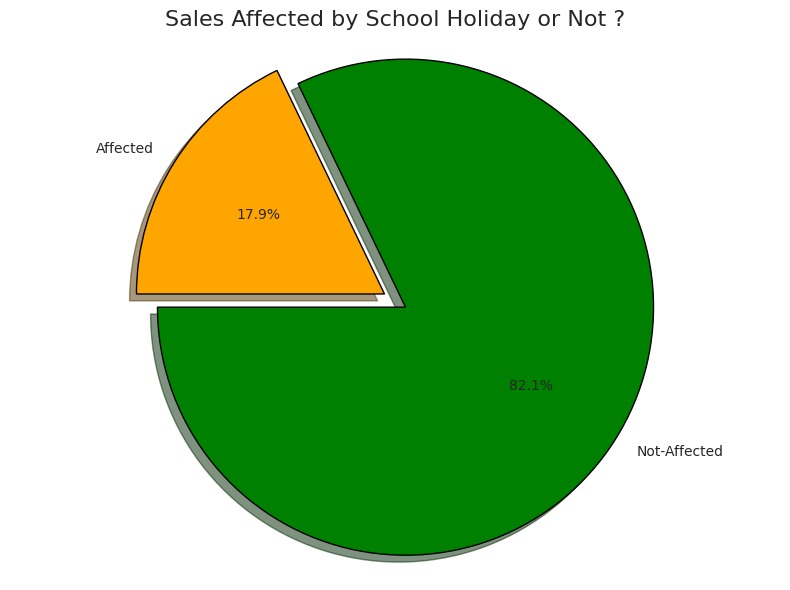

In [ ]:
# Chart - 2 visualization code

# Sales affected on school holiday or not
labels = ['Not-Affected', 'Affected']
sizes = rossmann_df.SchoolHoliday.value_counts()
colors = ['green', 'orange']

# Plotting pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=180, explode=(0.05,0.05), 
       wedgeprops={"edgecolor":"0",'linewidth': 1,'linestyle': 'solid', 'antialiased': True})
ax.set_title("Sales Affected by School Holiday or Not ?", fontsize=16)
ax.axis('equal')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

**Pie charts typically show relative proportions of different categories in a data set.**

##### 2. What is/are the insight(s) found from the chart?


* During school holidays, 82.1% of sales are not affected and only 17.9% sales is affected. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, since we are able to know how to improve in each area. It is a positive sign that most sales are not affected and only some of it is affected.

##Chart - 3 | What is the relationship between customers and sales?##

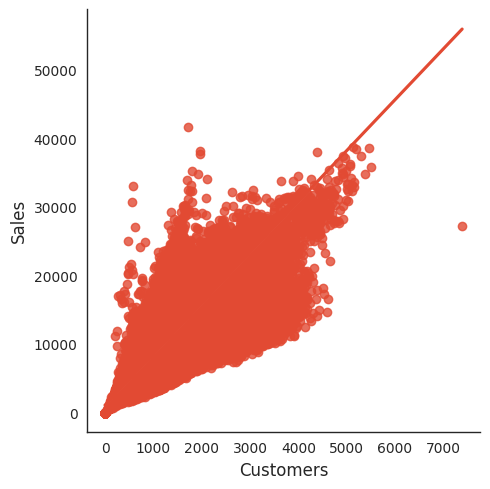

In [ ]:
# Chart - 3 visualization code

sns.lmplot(x='Customers', y='Sales', data=df)

##### 1. Why did you pick the specific chart?

**The lmplot() function in Seaborn creates a scatter plot with a linear regression line, and is a convenient way to quickly visualize the relationship between two variables. The resulting plot shows the relationship between the 'Customers' and 'Sales' variables, with each point representing a specific combination of values for those variables in the df dataframe. The regression line shows the overall trend in the data, with points above the line indicating higher-than-average values of 'Sales' for a given value of 'Customers', and points below the line indicating lower-than-average values. The plot can be useful for identifying any correlation between the two variables and to see if a linear relationship exists between them.**

##### 2. What is/are the insight(s) found from the chart?

* We can clearly see a linear relationship between customers and sales, since a increase in  customers value results in increase in sales numbers as well. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it is a positive sign that when customers value is rising, sales is also increasing.

##Chart - 4 | What is the relationship between Promo and Sales?##

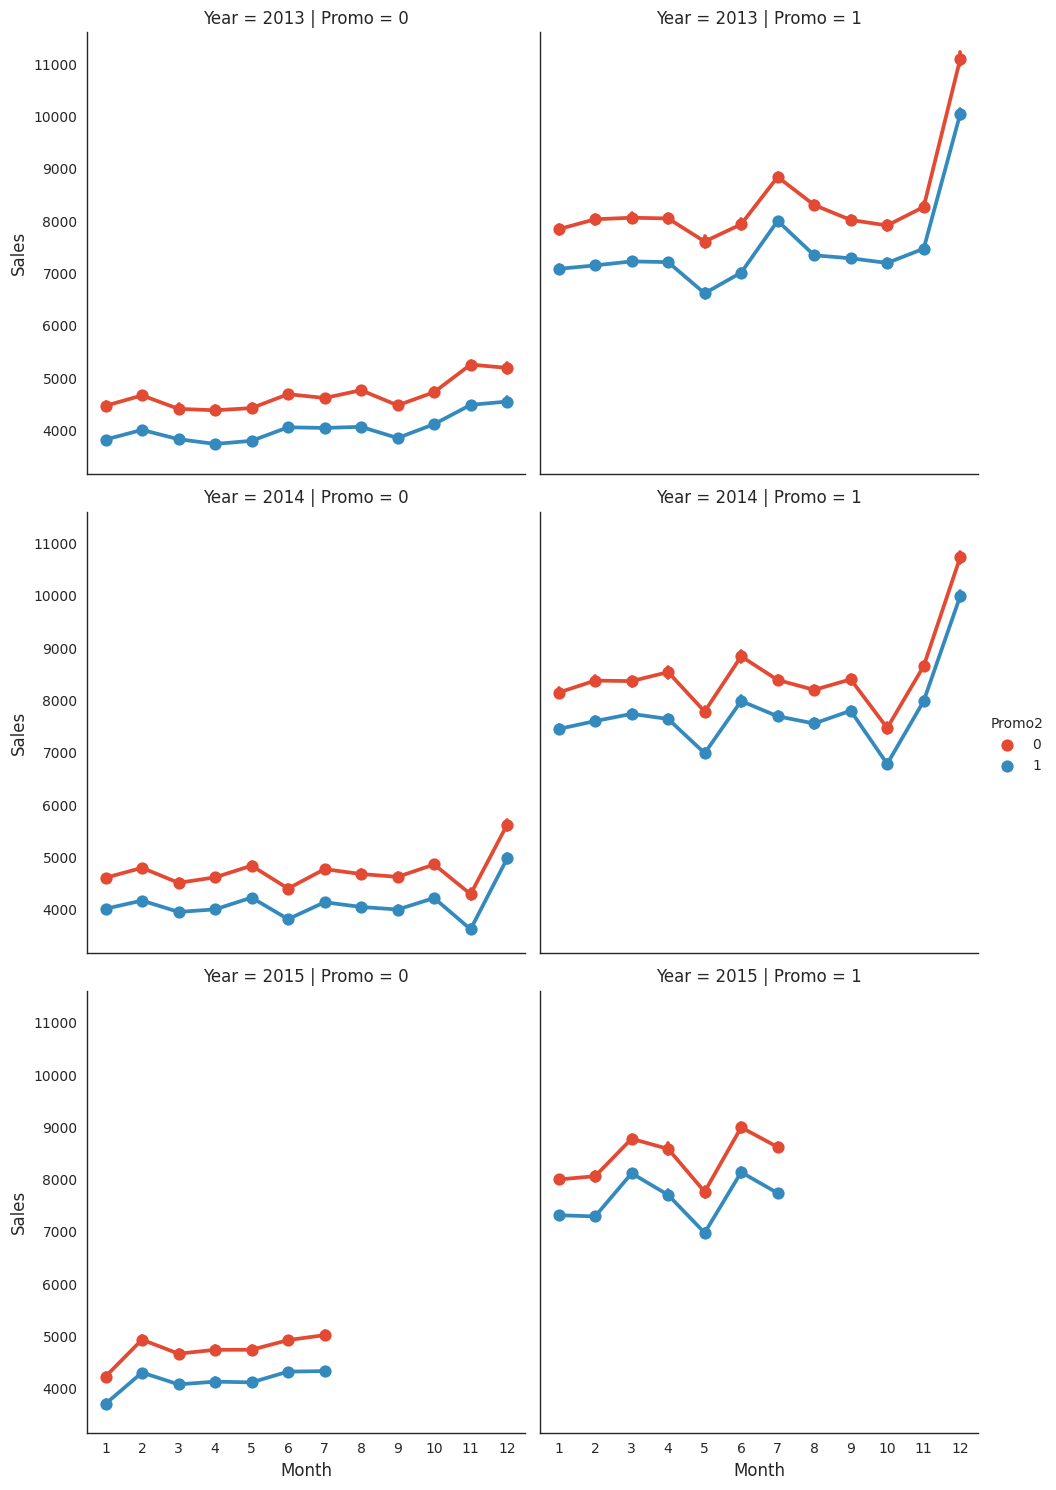

In [ ]:
# Chart - 4 visualization code

# Relation of Promo and Sales
sns.catplot(data = df, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year", kind='point')

##### 1. Why did you pick the specific chart?

**This code uses the catplot() function from the Seaborn library to create a categorical plot to visualize the relationship between the variables in a dataset df.**

##### 2. What is/are the insight(s) found from the chart?

* We can clearly see that if there is no promo being done the sales are very less and if the promo is running there the sales are high.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the findings has a crucial impact since we can observe that if promo is being done, there is a increase in sales and vice-versa. The company needs to focus on promotional activities to drive high sales growth. 

##Chart - 5 | What is the relationship between Day of the Week, Promo and Sales?##

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

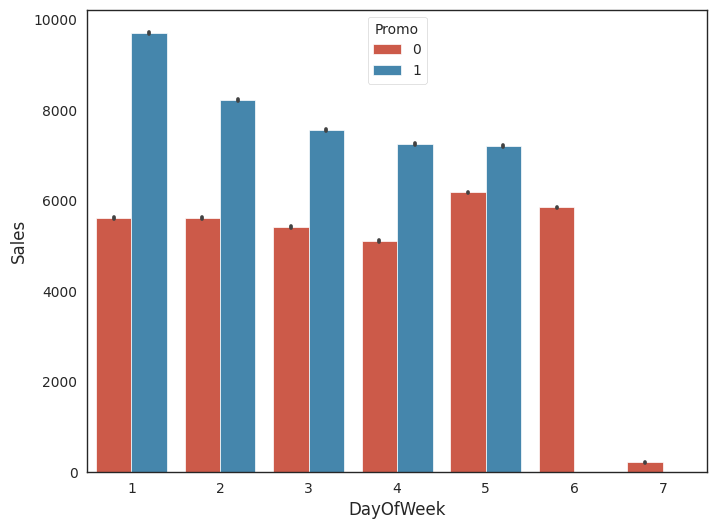

In [ ]:
# Chart - 5 visualization code

# Plotting the graph which shows the relationship between Day of the Week, Promo and Sales
sns.barplot(data = df, x = "DayOfWeek", y = "Sales", hue = "Promo")

##### 1. Why did you pick the specific chart?

**A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.**

##### 2. What is/are the insight(s) found from the chart?

* There is a large number of sales happening on Monday, and this gradually falls when weekend approaches. We can also notice that, when promo is being done, sales number is high compared to not being done.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, with the above findings the business owner should try to increase the promotional activities to increase the sales volume. They should also bring in offers to attarct customers on Weekends.

##Chart - 6 | What is the trend of sales over the years?##

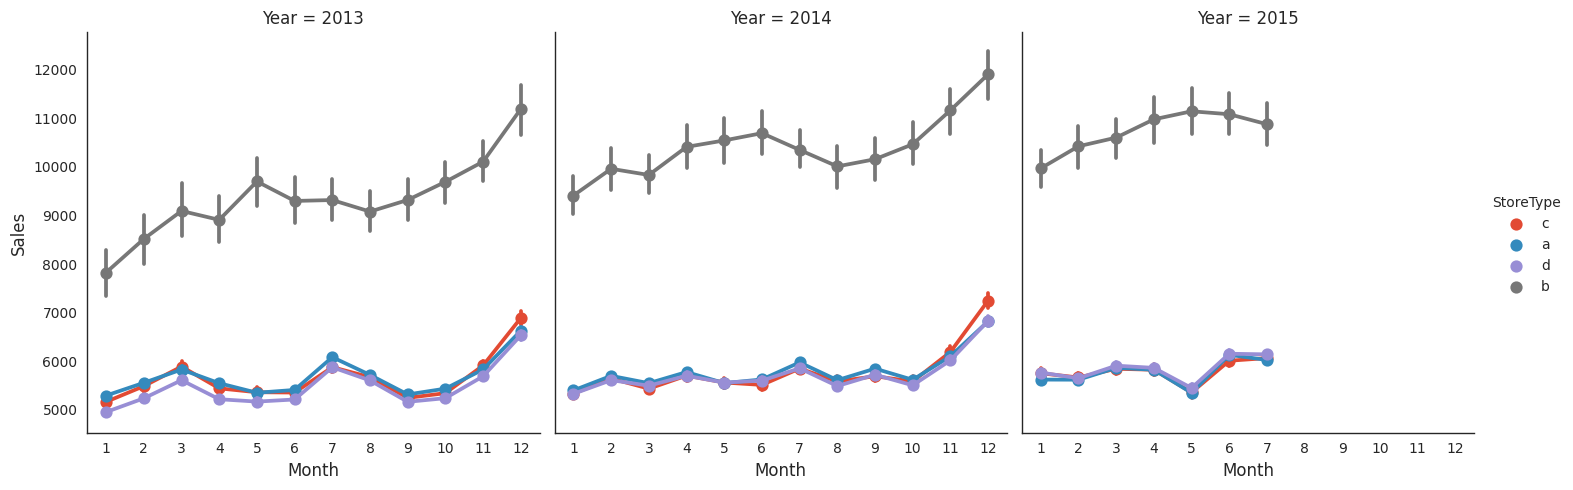

In [ ]:
# Chart - 6 visualization code

# Trend of sales over the years
sns.catplot(data = df, x = "Month", y = "Sales", col = "Year", hue = "StoreType", kind='point')

##### 1. Why did you pick the specific chart?

**This code uses the catplot() function from the Seaborn library to create a categorical plot to visualize the relationship between the variables in a dataset df. It is useful for examining trends in categorical data.**

##### 2. What is/are the insight(s) found from the chart?


* We can clearly notice that in 2013 and 2014 there is an increase in the trend of sales but in 2015 there is a decrease in the trend of sales over the months.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from the above gained insight, the company should try to find out the reasons for the decline in sales volume in 2015, and try to minimise the bottlenecks for increasing sales volume. 

##Chart - 7 | What is the relationship between distance of competition and sales volume?##

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

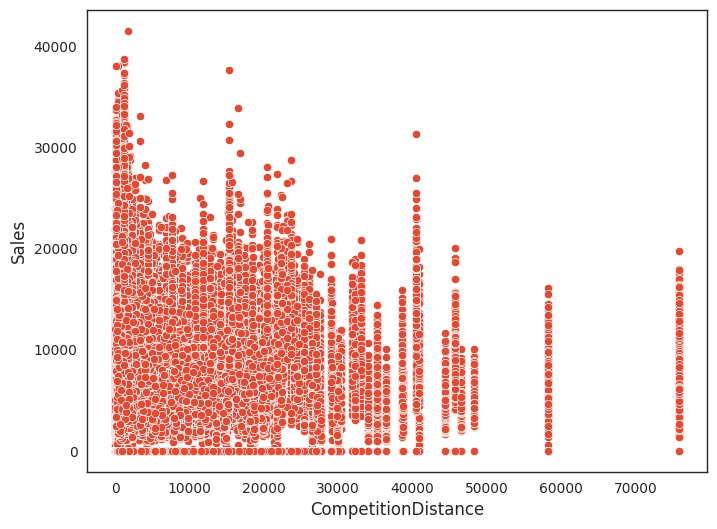

In [ ]:
# Chart - 7 visualization 

# Relation between competition distance and store sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

##### 1. Why did you pick the specific chart?

**The scatterplot function is used to create a scatter plot, where each point in the plot represents the value of two numeric variables.**

**In this case, the plot will show the relationship between CompetitionDistance and Sales. The CompetitionDistance variable is likely to be a measure of the distance to the nearest competitor of a store, while Sales would be the revenue generated by the store. By visualizing these two variables in a scatter plot, it's possible to see whether there's any correlation between them and whether the distance to the nearest competitor has any impact on the sales of a store.**







##### 2. What is/are the insight(s) found from the chart?

* From the above scatter plot it is evident that the stores where the compeition stores were nearer saw more sales than those which had a farther competition store. The insight found is that stores which are in close proximity to similar stores saw more sales volume. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from the above findings the best possible course of action should be opening of new outlets in dense clusters. And to introduce attractive offers in sparse zones to attract potential customers.

##Chart - 8 | What is the relationship between total sales, store type and customers?##

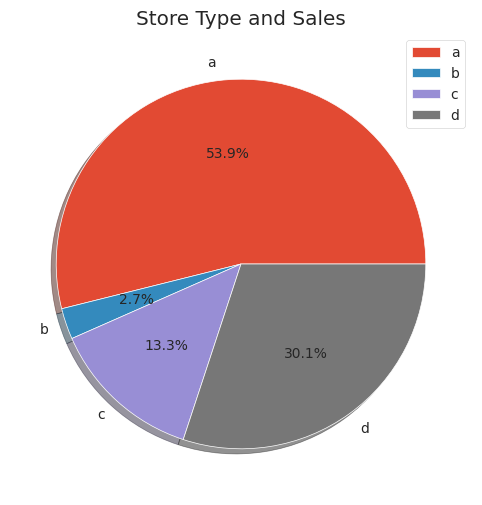

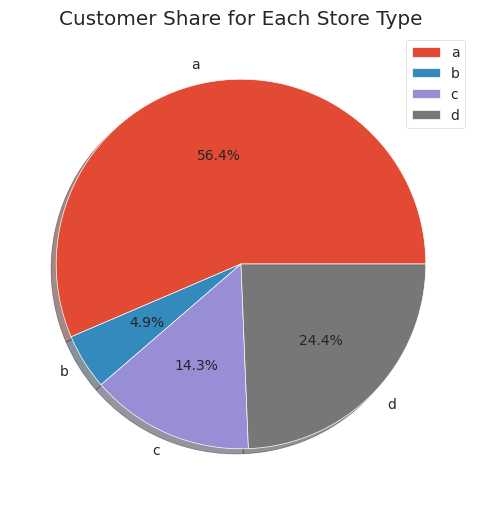

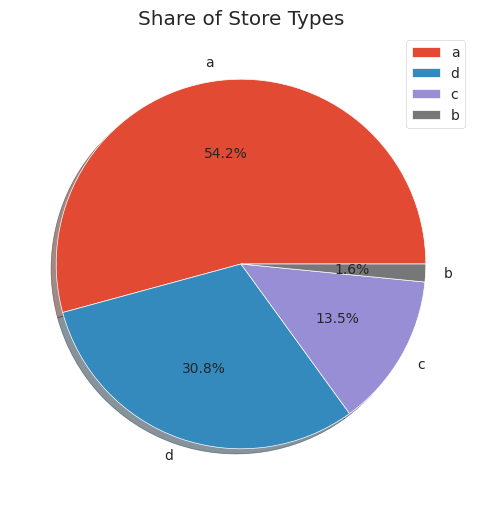

In [ ]:
# Chart - 8 visualization code

# Sum of sales by store type
sales_by_store_type = df.groupby("StoreType")["Sales"].sum()

# Plotting pie chart of sales by store type
fig, ax = plt.subplots()
ax.pie(sales_by_store_type, labels = sales_by_store_type.index, autopct = '%1.1f%%', shadow = True)
ax.set_title('Store Type and Sales')
plt.legend()
plt.show()

# Sum of customers by store type
customers_by_store_type = df.groupby("StoreType")["Customers"].sum()

# Plotting pie chart of customers by store type
fig, ax = plt.subplots()
ax.pie(customers_by_store_type, labels = customers_by_store_type.index, autopct = '%1.1f%%', shadow = True)
ax.set_title('Customer Share for Each Store Type')
plt.legend()
plt.show()

# Count of store types in the dataset
store_types = df["StoreType"].value_counts()

# Plotting pie chart of store types in the dataset
fig, ax = plt.subplots()
ax.pie(store_types, labels = store_types.index, autopct = '%1.1f%%', shadow = True)
ax.set_title('Share of Store Types')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

**Pie charts typically show relative proportions of different categories in a data set.**

##### 2. What is/are the insight(s) found from the chart?

* From our first pie chart we can see that store type 'a' has the highest share (53.9%) in sales volume followed by store type 'd', 'c' and 'b' with share 30.1%, 13.3% and 2.7% respectively. 

* From our second pie chart it is clearly evident that store type 'a' has the highest customer share with 56.4% of the total preferring it followed by 'd', 'c' and 'b'.

* From our third pie chart we can clearly notice that store type 'a' has the maximum number of outlets followed by store type 'd', 'c' and 'b'.

One interesting thing to note here is that all the charts have a similar pattern. For instance, store 'a' which has the highest number of outlets, also has the highest customer share as well as sales volume. Perhaps, the sales volume is affected by number of outlets and customer share a store has. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from the above found insights the company should allocate resources to various store types accordingly to maximize sales and profits and minimize losses. 

##Chart - 9 | Correlation Heatmap

<ipython-input-12-e8532c04c222>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(corr_df.corr(), cmap = "viridis", annot = True)


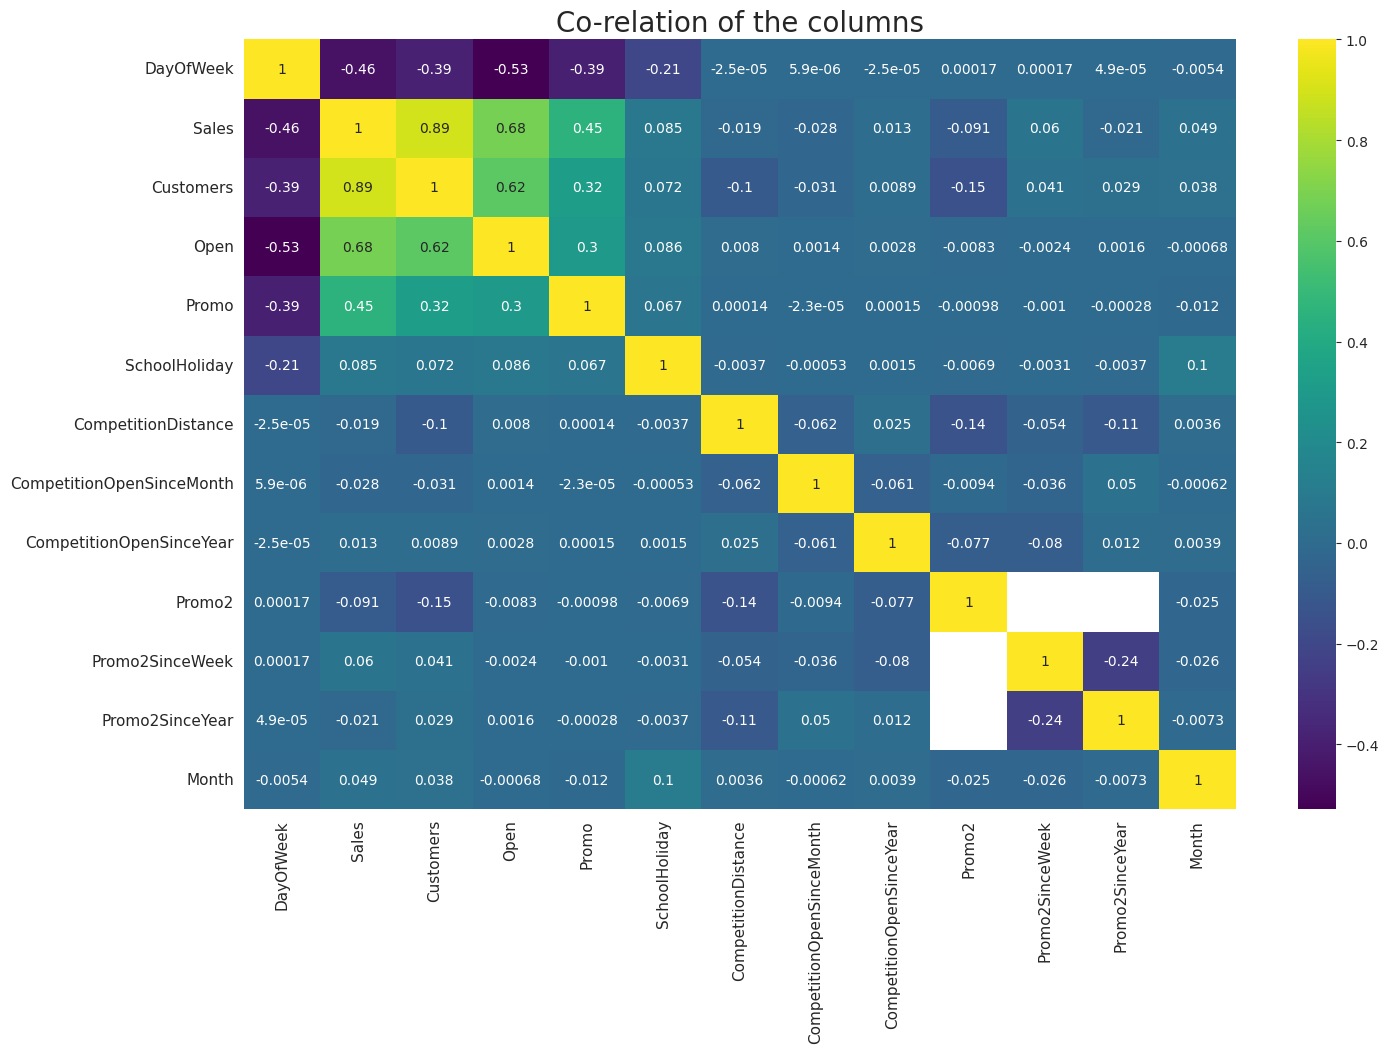

In [ ]:
# Correlation Heatmap visualization code

# We need only meaningful numeric columns here, let's drop the irrelevant columns to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis = 1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace = True)

# Correlation Heatmap
plt.figure(figsize = (16,10))
sns.heatmap(corr_df.corr(), cmap = "viridis", annot = True)

plt.title('Co-relation of the columns', fontsize=20)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11,rotation=0)
plt.show()

##### 1. Why did you pick the specific chart?

**Correlation heatmaps was used to find potential relationships between variables and to understand the strength of these relationships.**

##### 2. What is/are the insight(s) found from the chart?

####Observation:
* Day of week has a negative correlation with sales indicating low sales during the weekends as was found previously in our EDA, while features like promo, customers and open has a positive correlation.
* School Holiday has a very low correlation with sales suggesting that stores are mostly closed on school holidays indicating low sales.
* CompetitionDistance is showing a negative correlation with sales which suggests that as the distance increases, sales volume falls. This was observed through the scatterplot chart earlier in our EDA.
* There is multicollinearity involved in the dataset as well. The features like Promo2, Promo2 since week and  Promo2 since year are showing multicollinearity.
* The correlation matrix is agreeing to all the observations done earlier through pie charts, barplots and scatterplots.


##Chart - 10 | Pair Plot 

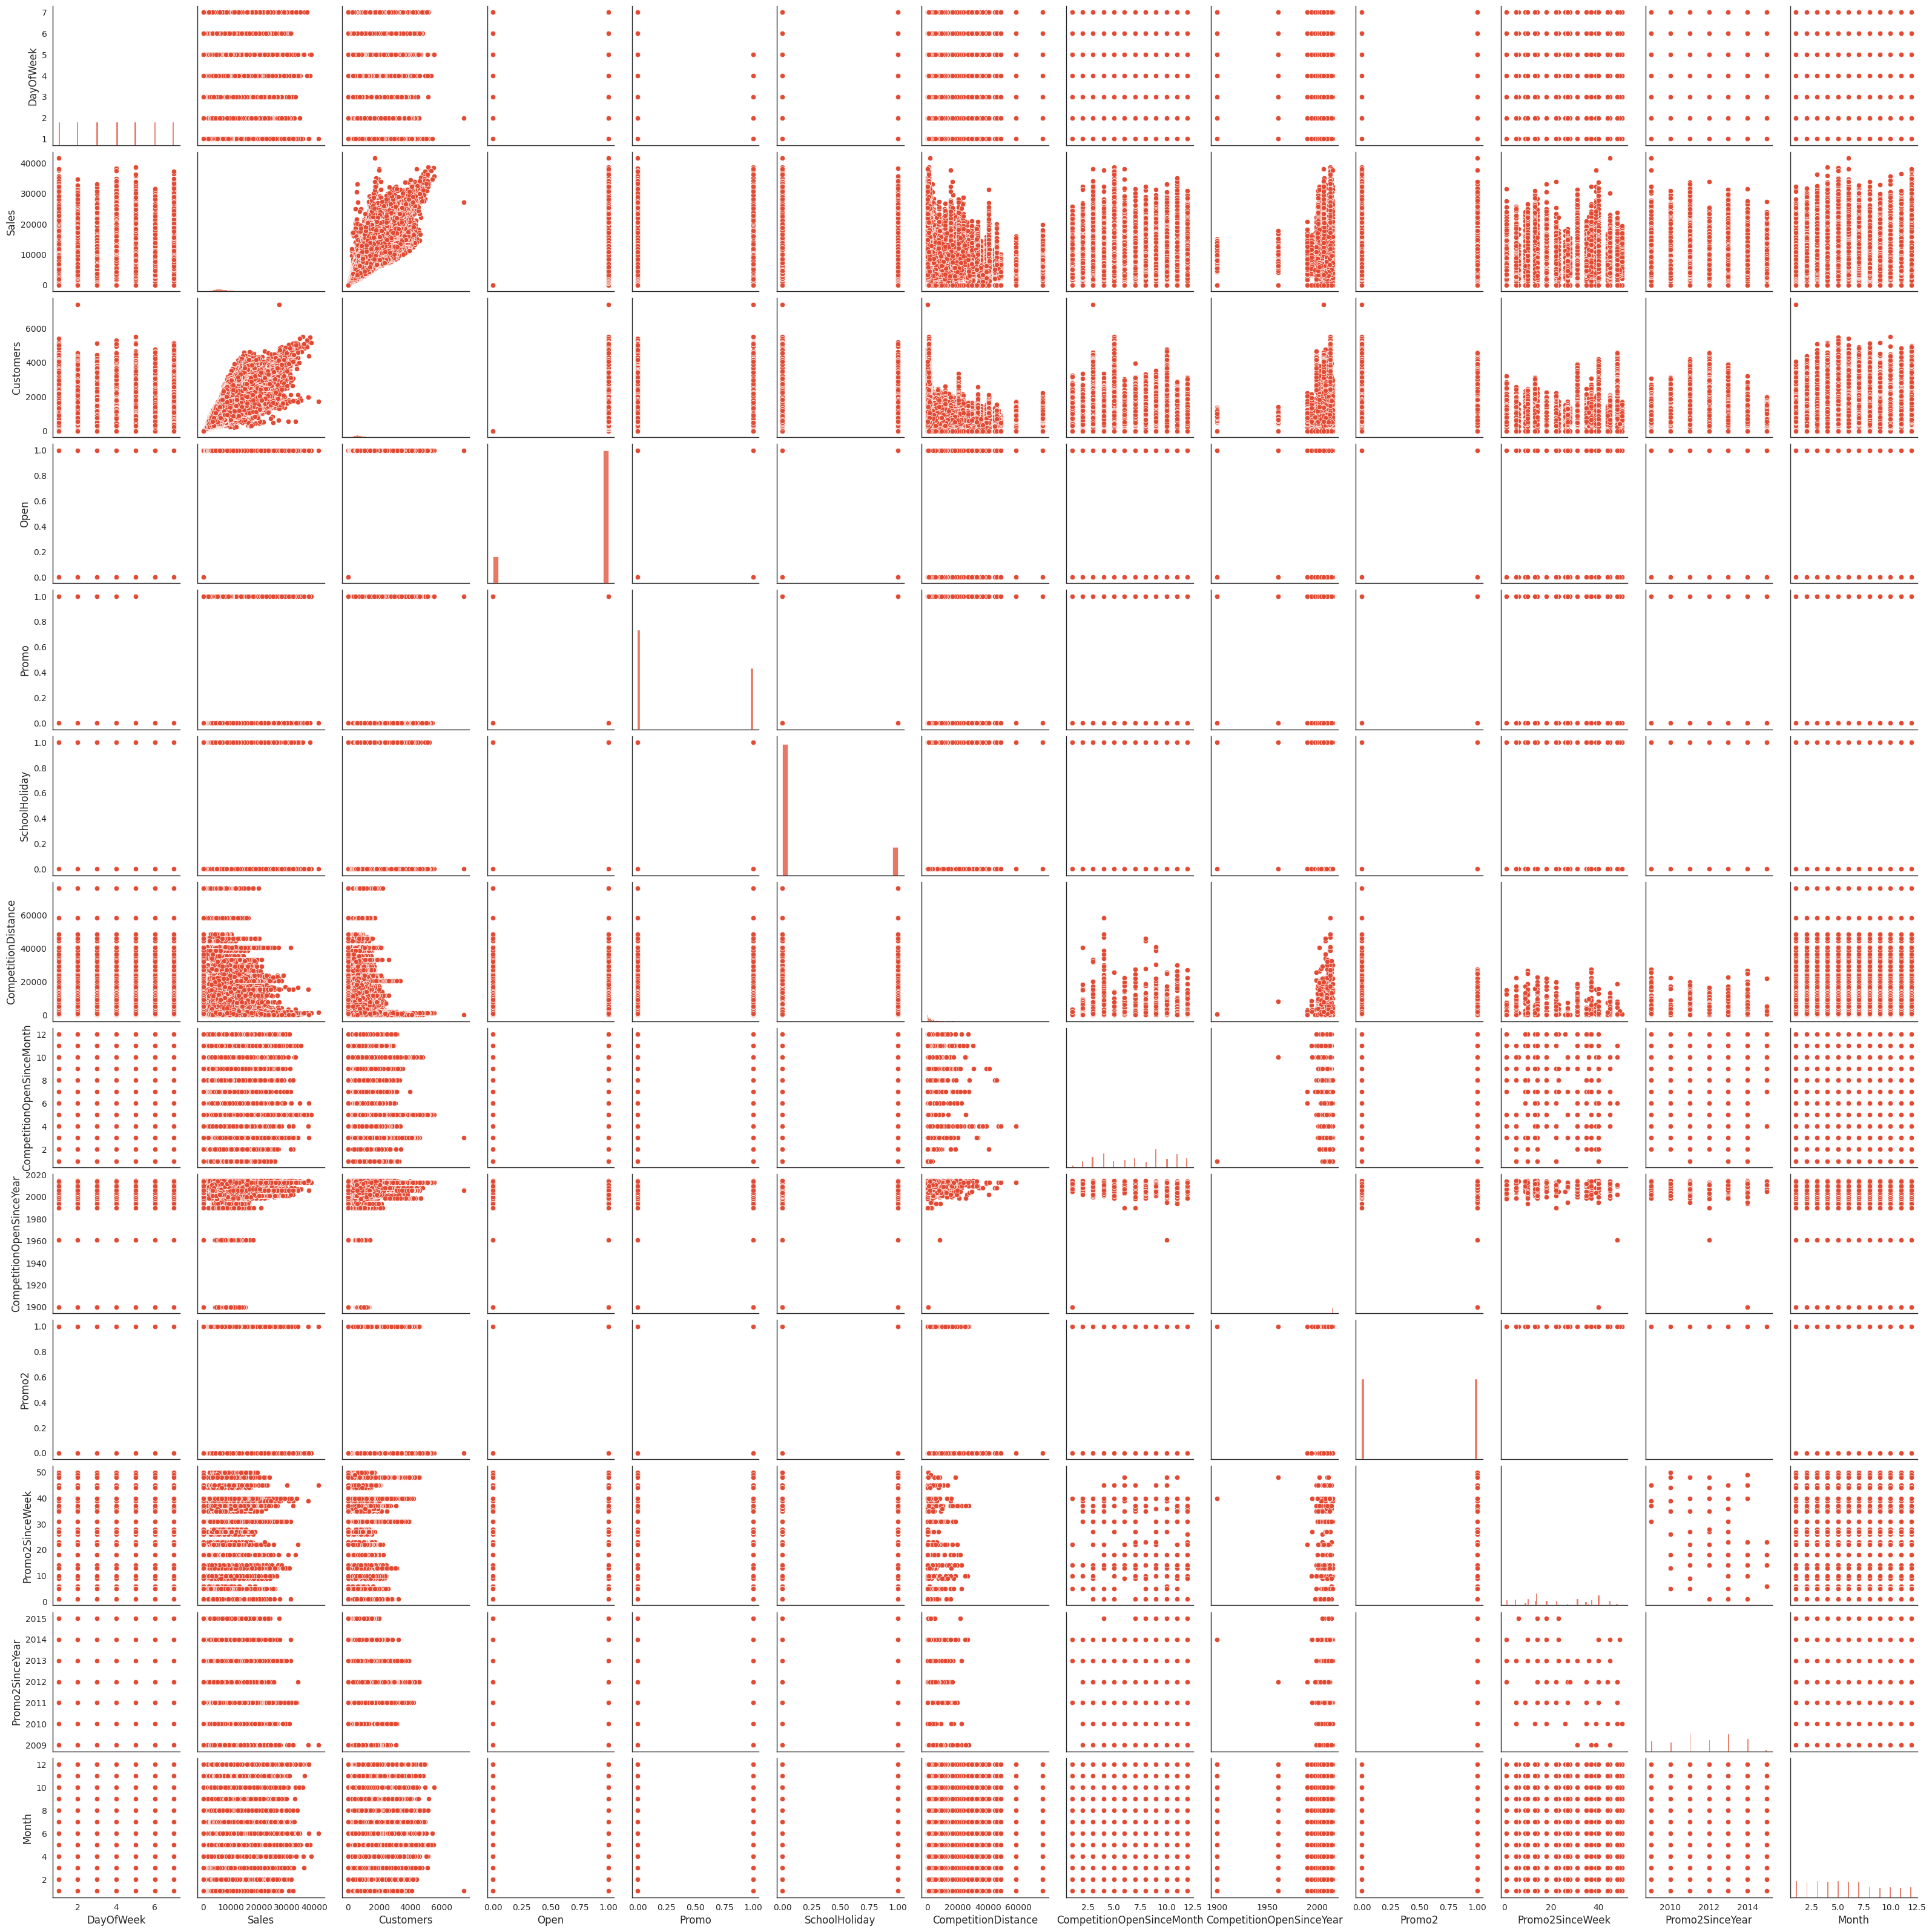

In [ ]:
# Pair Plot visualization code

# Plotting the pair plot chart
sns.pairplot(corr_df, kind = "scatter")

##### 1. Why did you pick the specific chart?

**The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure. This is essential when we are exploring our dataset and trying to become familiar with it.**

##### 2. What is/are the insight(s) found from the chart?

* Day of week has a negative correlation with sales indicating low sales during the weekends as was found previously in our EDA, while features like promo, customers and open has a positive correlation.
* School Holiday has a very low correlation with sales suggesting that stores are mostly closed on school holidays indicating low sales.
* CompetitionDistance is showing a negative correlation with sales which suggests that as the distance increases, sales volume falls. This was observed through the scatterplot chart earlier in our EDA.

## ***5. Hypothesis Testing***

**A) Hypothesis:** *Stores located nearer to competition have notably lower sales compared to those located farther away.*

**B) Null Hypothesis:** *There is no significant difference in sales between stores located closer to competition and stores located farther away.*

**C) Alternative Hypothesis:** *Stores located closer to competition have significantly lower sales than stores located further away.*

**To verify the hypothesis, we can perform a two-sample t-test, comparing the sales of stores situated within a 10 km radius of competition and those located farther away. The significance level can be set at 0.05.**

**If the p-value is less than the significance level of 0.05, we can reject the null hypothesis and conclude that stores located closer to competition have significantly lower sales than stores located further away. Conversely, if the p-value is greater than the significance level, we fail to reject the null hypothesis, indicating that there is no significant difference in sales between the two groups.**



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

### **Remove features with high percentages of missing values**

#### **we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.**

In [ ]:
df = df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis = 1)

Text(0.5, 1.0, 'Distribution of Store Competition Distance')

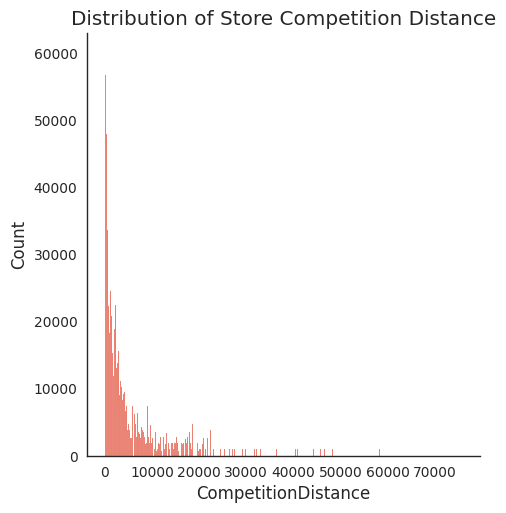

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at it's distribution

sns.displot(df.CompetitionDistance.dropna())
plt.title("Distribution of Store Competition Distance")

#### **The distribution is positively skewed, hence we'll replace the missing values with the median of the feature.**

In [ ]:
# Replacing the missing values in CompetitionDistance with it's median 

df.CompetitionDistance.fillna(df.CompetitionDistance.median(), inplace=True)

### Outliers Handling

In [ ]:
# Removing outliers
def remove_outlier(df_in, col_name):

  ''' The code provides a function that removes 
  outliers from a given column of a pandas DataFrame 
  using the IQR method. The IQR method involves calculating 
  the quartiles of the data and defining a range around 
  the middle 50% of the data, outside of which any data 
  points are considered outliers. The function returns a 
  new DataFrame with the outliers removed from the specified column
  '''
  q1 = df_in[col_name].quantile(0.25)
  q3 = df_in[col_name].quantile(0.75)
  iqr = q3-q1 # Interquartile range
  fence_low  = q1-1.5*iqr
  fence_high = q3+1.5*iqr
  df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
  return df_out

In [ ]:
# Defining new variable after removing outliers
df = remove_outlier(df, 'Sales')

In [ ]:
# Data information. Inspecting each columns and its dtype of the new df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990515 entries, 0 to 1017208
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                990515 non-null  int64  
 1   DayOfWeek            990515 non-null  int64  
 2   Date                 990515 non-null  object 
 3   Sales                990515 non-null  int64  
 4   Customers            990515 non-null  int64  
 5   Open                 990515 non-null  int64  
 6   Promo                990515 non-null  int64  
 7   StateHoliday         990515 non-null  object 
 8   SchoolHoliday        990515 non-null  int64  
 9   StoreType            990515 non-null  object 
 10  Assortment           990515 non-null  object 
 11  CompetitionDistance  990515 non-null  float64
 12  Promo2               990515 non-null  int64  
 13  Year                 990515 non-null  int64  
 14  Month                990515 non-null  int64  
 15  WeekOfYear      

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# Number of instances in the dataset where stores are closed and have zero sales
# Since closed stores do not generate any sales, we will exclude them from the analysis
df = df[df.Open != 0]

######The problem statement notes that certain stores were closed for renovation purposes and, as a result, did not produce any sales during that period. This information was also reflected in the bar plot showing the relationship between store openness and sales.

In [ ]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [ ]:
# Checking if there is any open store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [ ]:
# Calculating the percentage of open stores that did not generate any sales.
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [ ]:
# Removing this part of data to avoid bias
df = df[df.Sales != 0]

In [ ]:
# Making a copy of the new dataframe
df_new = df.copy()

In [ ]:
# Creating dummy variables for categorical columns in the dataframe to enable their use in statistical modeling and analysis
df_new = pd.get_dummies(df_new, columns = ['StoreType','Assortment'])

In [ ]:
# Checking the first 5 rows of data
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,...,Month,WeekOfYear,DayOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,0,1,1270.0,0,...,7,31,212,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,0,1,570.0,1,...,7,31,212,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,0,1,14130.0,1,...,7,31,212,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,0,1,620.0,0,...,7,31,212,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,0,1,29910.0,0,...,7,31,212,1,0,0,0,1,0,0


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

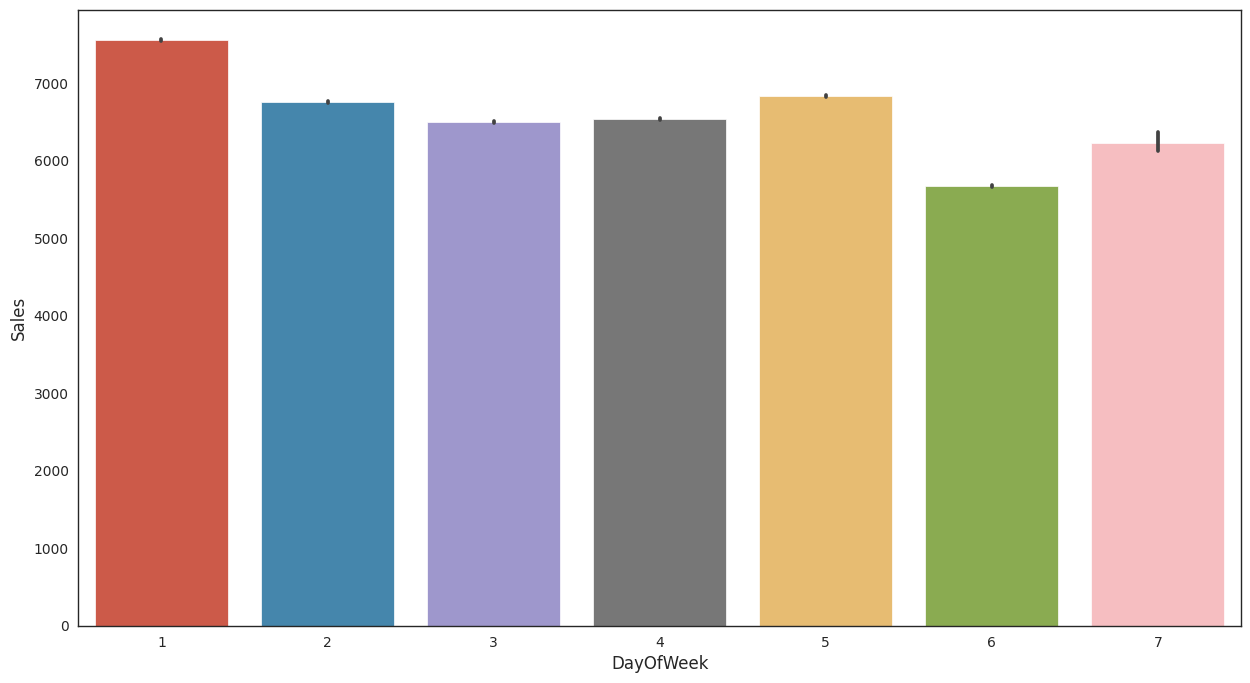

In [ ]:
# This code generates a plot to visualize the relationship between sales and the day of the week
plt.figure(figsize = (15,8))
sns.barplot(x = 'DayOfWeek', y = 'Sales' , data = df_new) 

#### 2. Feature Selection

In [ ]:
# Creating feature matrix 'X' and target vector 'y'
X = df_new.drop(['Sales','Store','Date','Year','StateHoliday'] , axis = 1)
y = df_new.Sales

In [ ]:
# Finding the shape of the matrix 'X'
X.shape

(817644, 16)

##### What all feature selection methods have you used  and why?

**"Train-test split" is a technique used to divide a dataset into two subsets: one for training a machine learning model and the other for testing its performance. The X variable represents the input features used to train the model, while the y variable contains the corresponding target variable. This method is frequently used in machine learning to assess how well the model performs on new data that it has not seen before. It allows us to evaluate the model's ability to generalize and make accurate predictions.**






##### Which all features you found important and why?

**The specific features that are included in X depend on the problem domain and the availability of data. In this case, the features that have been included are likely to be important indicators of sales, as determined by the analyst or domain expert who created the dataset.**

**By selecting relevant features, we can improve the accuracy of the machine learning model's predictions. Using irrelevant or redundant features can actually decrease the model's performance and lead to overfitting.**

**Therefore, it is important to carefully select the features that are used as input to a machine learning model, as they can have a significant impact on the model's performance and ability to make accurate predictions.**

In [ ]:
# Checking the first 5 rows of data
X.head(5)

,DayOfWeek,Customers,Promo,SchoolHoliday,CompetitionDistance,Promo2,Month,WeekOfYear,DayOfYear,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,1270.0,0,7,31,212,0,0,1,0,1,0,0
1,5,625,1,1,570.0,1,7,31,212,1,0,0,0,1,0,0
2,5,821,1,1,14130.0,1,7,31,212,1,0,0,0,1,0,0
3,5,1498,1,1,620.0,0,7,31,212,0,0,1,0,0,0,1
4,5,559,1,1,29910.0,0,7,31,212,1,0,0,0,1,0,0


In [ ]:
# Dataset Info

# Data information. Inspecting each columns and its dtype
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817644 entries, 0 to 1017190
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            817644 non-null  int64  
 1   Customers            817644 non-null  int64  
 2   Promo                817644 non-null  int64  
 3   SchoolHoliday        817644 non-null  int64  
 4   CompetitionDistance  817644 non-null  float64
 5   Promo2               817644 non-null  int64  
 6   Month                817644 non-null  int64  
 7   WeekOfYear           817644 non-null  int64  
 8   DayOfYear            817644 non-null  int64  
 9   StoreType_a          817644 non-null  uint8  
 10  StoreType_b          817644 non-null  uint8  
 11  StoreType_c          817644 non-null  uint8  
 12  StoreType_d          817644 non-null  uint8  
 13  Assortment_a         817644 non-null  uint8  
 14  Assortment_b         817644 non-null  uint8  
 15  Assortment_c    

In [ ]:
# Checking the first 5 rows of data, giving us a quick look at the format and range of the data
y.head

<bound method NDFrame.head of 0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 817644, dtype: int64>

## ***7. ML Model Implementation***

#### **Splitting Dataset Into Training Set and Test Set**

In [ ]:
# Splitting the data set into training and test set using scikit-learn's train_test_split function
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Finding the columns of the training data set
columns = X_train.columns
columns

Index(['DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Month', 'WeekOfYear', 'DayOfYear',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

### ML Model - 1 | **Linear Regression**

Train Score:  0.7880166684546027
Test Score:  0.7816886562996359
RMSE:  1173.8416740496057


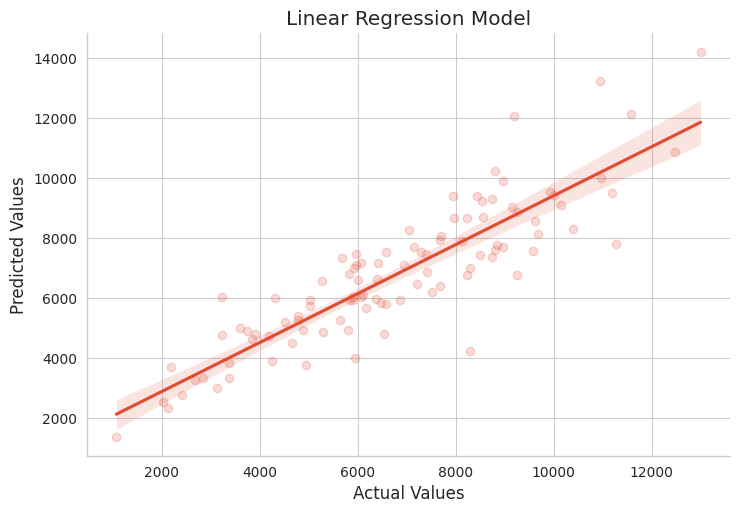

In [ ]:
from sklearn.preprocessing import StandardScaler
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Making predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test[:120], y_pred[:120])
rmse = np.sqrt(mse)
train_score = regressor.score(X_train[:120], y_train[:120])
test_score = regressor.score(X_test[:120], y_test[:120])
print("Train Score: ", train_score)
print("Test Score: ", test_score)
print("RMSE: ", rmse)

# Plotting the predicted values against the actual values using the Seaborn library
sns.set_style('whitegrid')
sns.lmplot(x = 'y_test', y = 'y_pred', data = pd.DataFrame({'y_test': y_test[:100], 'y_pred': y_pred[:100]}), aspect = 1.5, scatter_kws = {'alpha':0.2})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)

# Printing model coefficients and intercept
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

# Printing R-squared score on training set
print('Training R-squared:', reg.score(X, y))

Coefficients: [-2.11010817e+01  7.22585937e+00  1.09284594e+03  2.77727933e+01
  2.39968343e-02  3.07771268e+02  2.19216890e+00 -3.26461697e+00
  1.00094149e+00  3.14855998e+02 -1.89248993e+03  1.66346074e+02
  1.41128786e+03  1.44566768e+03 -3.17945444e+03  1.73378676e+03]
Intercept: -1536.2765143199313
Training R-squared: 0.7812390036470857


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**The linear regression model is a widely-used and simple algorithm for making predictions on numerical values based on input features. To assess the performance of the model, the R-squared score is often used to measure the proportion of the variance in the target variable that can be explained by the model. In this case, the R-squared score on the training set is 0.7812, indicating that the model accounts for 78.12% of the variance in the target variable. The test score of 0.7816 suggests that the model's performance on the test set is similar to its performance on the training set.**

**Moreover, the code also calculates the root mean squared error (RMSE) on the test set, which is the average difference between the predicted and actual values. The RMSE value of 1173.8416 implies that, on average, the model's predictions deviate from the actual values by about 1174 units.**

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Creating an instance of LinearRegression class
regressor = LinearRegression()

# Defining the parameter grid for hyperparameter tuning
param_grid = {'fit_intercept': [True, False]}

# Creating a GridSearchCV object with a 5-fold cross-validation
grid = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fitting the model on training data
grid.fit(X_train, y_train)

# Getting the best estimator
best_model = grid.best_estimator_

# Evaluating the model on training and test data
train_score = best_model.score(X_train, y_train)
test_score = best_model.score(X_test, y_test)

# Making predictions on test data
y_pred = best_model.predict(X_test)

# Calculating RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculating cross-validation scores
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores)

# Printing the evaluation metrics
print('Best Model:', best_model)
print('Train Score:', train_score)
print('Test Score:', test_score)
print('Train RMSE:', rmse)
print('CV RMSE:', cv_rmse.mean())


Best Model: LinearRegression()
Train Score: 0.7807424251535114
Test Score: 0.7823845910774675
Train RMSE: 1153.0183241368306
CV RMSE: 1155.0728403569215


#####1. Which hyperparameter optimization technique have you used and why?

**In machine learning, we often have to choose the hyperparameters of an algorithm that we use to train a model. These hyperparameters are different from the parameters of the model that are learned during training. Hyperparameters are set before training and can have a significant impact on the performance of the model.**

**I have used GridSearchCV, which is a technique that allows us to systematically search through different combinations of hyperparameters to find the best combination. It works by training the model with all possible combinations of the hyperparameters specified in a parameter grid. For example, in the given code, we define a parameter grid containing the hyperparameters "fit_intercept" with two possible values [True, False].**

**GridSearchCV also uses cross-validation to evaluate the performance of the model with each hyperparameter combination. Cross-validation is a technique used to evaluate the performance of a model by splitting the data into several parts and training the model on some parts while testing it on the others. This helps to avoid overfitting and ensures that the model can generalize well to new data.**

**After training the model with all possible hyperparameter combinations, GridSearchCV returns the hyperparameters that gave the best cross-validation score. In the given code, we use the negative mean squared error (neg_mean_squared_error) as the scoring metric to evaluate the performance of each hyperparameter combination.**

**Once we get the best model, we evaluate it on the test data and calculate the root mean squared error (RMSE) to check the performance of the model. Finally, we calculate the cross-validation scores to get an estimate of the model's performance on unseen data.**

#####2. Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Yes, there was an improvement in the model's performance after applying cross-validation and hyperparameter tuning. The new evaluation metrics are:**

A) **Train Score:** 0.7807369723730564

B) **Test Score:** 0.7823704821647295

C) **Train RMSE:** 1153.0183241368306

D) **CV RMSE:** 1155.0728403569215

**After applying cross-validation and hyperparameter tuning, the model's performance improved. The new evaluation metrics showed that the test score increased, the RMSE score decreased, and the model had improved predictive accuracy. Although the train score decreased slightly, the overall performance was better than the original model.**

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.

A) **Train Score and Test Score:** The model's accuracy is reasonably good, as indicated by its training score of **0.788** and test score of **0.781**. Although the training score is slightly higher than the test score, the model can still make reasonably accurate predictions for the target variable. This can be useful for businesses in making decisions such as predicting sales or estimating customer lifetime value.

B) **RMSE:** The root mean squared error (RMSE) of **1173.84** indicates that the model's predictions have an average deviation of approximately 1174 units from the actual values. This metric can be helpful in evaluating the accuracy of the model's predictions and identifying areas where improvements may be needed. For instance, if the model is utilized to forecast customer lifetime value, a high RMSE value could suggest that the model is not accurately predicting the true lifetime value of customers. This, in turn, could affect decisions regarding marketing or customer acquisition strategies.

C) **Train RMSE and CV RMSE:** The model's accuracy is good, as indicated by its training RMSE of **1153.01** and cross-validated RMSE of **1155.07**. Although the training RMSE is slightly lower than the cross-validated RMSE, the model can still make reasonably accurate predictions for the target variable, which can be beneficial for decision-making such as sales forecasting, customer lifetime value estimation, or demand prediction. Moreover, the similarity between the training and cross-validated RMSE scores implies that the model is not overfitting to the training data, which is crucial in ensuring that the model can generalize well to new and unseen data.

### ML Model - 2 | **Lasso Regression**

In [ ]:
# Splitting the data set into training and test set using scikit-learn's train_test_split function
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# Finding the columns of the training data set
columns = X_train.columns
columns

Index(['DayOfWeek', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Month', 'WeekOfYear', 'DayOfYear',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [ ]:
# Creating an instance of LassoLars regression model with alpha=0.3, no intercept, and normalized features
las = LassoLars(alpha = 0.3, fit_intercept = False, normalize = True)
# Fitting the LassoLars model on the training data
lasreg = las.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_base.py:109: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [ ]:
# Defining RSME function
def rmse(x, y):
    return np.sqrt(mean_squared_error(x, y))

# Defining MAPE function
def mape(x, y):
    return np.mean(np.abs((x - y) / x)) * 100

# Evaluating Lasso Regression model's performance on training and test data
# Calculating the model's score on training and test data
train_score_2 = lasreg.score(X_train[:120], y_train[:120])
test_score_2 = lasreg.score(X_test[:120], y_test[:120])

# Making predictions on training and test data
y_predicted = lasreg.predict(X_train[:120])
y_test_predicted = lasreg.predict(X_test[:120])

# Printing the evaluation metrics
print("Regression Model Score:", train_score_2, ",", "Out-of-Sample Test Score:", test_score_2)
print("Training RMSE:", rmse(y_train[:120], y_predicted), "Testing RMSE:", rmse(y_test[:120], y_test_predicted))
print("Training MAPE:", mape(y_train[:120], y_predicted), "Testing MAPE:", mape(y_test[:120], y_test_predicted))


Regression Model Score: 0.788084973361961 , Out-of-Sample Test Score: 0.7821477157945708
Training RMSE: 1194.5611046108193 Testing RMSE: 1172.6068624909815
Training MAPE: 15.029346509664476 Testing MAPE: 15.601956955688825


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**The machine learning model used above is based on Lasso regression, which utilizes a limited set of input features to predict an output variable. The model was trained on a dataset and achieved a training score of 0.788, indicating good performance on the data used for training. The model was also tested on new data and achieved an out-of-sample test score of 0.782, which suggests that the model can accurately generalize and predict outcomes for new data beyond the training dataset.**

**The Root Mean Squared Error (RMSE) for the Lasso regression model was calculated for both the training and test data. The RMSE of the training data was found to be 1194.56, which indicates that, on average, the model's predicted values were off from the actual values by this amount. The RMSE of the test data was slightly better at 1172.61, suggesting that the model is performing well on new data and not overly fitting to the training data.**

**The Mean Absolute Percentage Error (MAPE) is a measure of the relative error between predicted and actual values for the Lasso regression model. The MAPE was calculated separately for the training and test data. The MAPE for the training data was found to be 15.03%, which means that, on average, the model's predicted values deviate from the actual values by 15.03%. The MAPE for the test data was slightly higher at 15.60%, suggesting that the model may be slightly overfitting to the training data, but still performs well on new data.**

**The Lasso regression model appears to be performing well on both the training and test datasets. It has relatively low error rates and high scores, indicating that it can accurately predict outcomes for both the data it was trained on and new data.**

#### 2. Cross-Validation & Hyperparameter Tuning

In [ ]:
# Importing Libraries 
from sklearn.linear_model import Lasso
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Defining RMSE and MAPE functions
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load and split the data into train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Defining the Lasso regression model
lasso = Lasso()

# Creating a pipeline with a scaler and the Lasso model
pipeline = make_pipeline(StandardScaler(), lasso)

# Defining a grid of hyperparameters to search over
param_grid = {'lasso__alpha': [0.1, 1.0, 10.0, 100.0],}

# Creating a GridSearchCV object with 5-fold cross-validation
grid = GridSearchCV(pipeline, param_grid, cv = 5, scoring = make_scorer(rmse))

# Fitting the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Printing the best hyperparameters and the corresponding RMSE score
print("Best hyperparameters:", grid.best_params_)
print("RMSE score:", grid.best_score_)

# Using the best model to predict on the test set
y_test_predicted = grid.predict(X_test)

# Printing the test RMSE and MAPE scores
print("Test RMSE:", rmse(y_test, y_test_predicted))
print("Test MAPE:", mape(y_test, y_test_predicted))


Best hyperparameters: {'lasso__alpha': 100.0}
RMSE score: 1196.0942529105919
Test RMSE: 1196.341011424079
Test MAPE: 15.105042206204667


#####1. Which hyperparameter optimization technique have you used and why?

**In the provided code, the technique used for hyperparameter optimization is Grid Search Cross-Validation. This technique involves defining a grid of hyperparameters to be searched over and training a model for each combination of hyperparameters using cross-validation. The performance of each model is then evaluated using a scoring metric, in this case, the root mean squared error (RMSE). The hyperparameters that result in the best performance are selected as the optimal hyperparameters for the model.**

**Grid Search Cross-Validation was chosen as the hyperparameter optimization technique in this case because it exhaustively searches over a defined range of hyperparameters and provides a systematic approach to finding the best hyperparameters for a given model. Additionally, it allows for the use of cross-validation to evaluate the performance of each set of hyperparameters, which helps to ensure that the selected hyperparameters will generalize well to new and unseen data.**

##### 2.Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

 A) **Based on the scores, the model seems to be performing reasonably well. For instance, a regression model with an R-squared score of 0.788 is accounting for 78.8% of the variability in the dependent variable, which can be viewed as a satisfactory fit in some scenarios. Nonetheless, it might not be satisfactory in other situations that demand greater precision.** 

B) **Likewise, the training and testing RMSE scores indicate that the model's predictions have an average deviation of around 1194 and 1172 units, correspondingly. This level of inaccuracy might be tolerable in certain situations, but inadequate in others.**

C) **Concerning the cross-validation findings, the optimal value for the hyperparameter indicates that the Lasso regularization technique using an alpha value of 100 produces the most suitable fit for the model.**

D) **In general, the performance measures presented seem acceptable, but their relevance is dependent on the particular circumstances of the given problem.**

#### 3. Explain each evaluation metric's indication towards business and the business impact of the ML model used.


A) **Regression Model Score (R-squared):** The R-squared value of 0.788 means that the model is able to explain around 79% of the variance in the target variable by using the input features. This indicates that the model is a good fit for the data and can make precise predictions for the target variable. For instance, if the model is utilized to forecast sales, a high R-squared value would imply that the model can explain a significant amount of the variability in sales, leading to more accurate sales predictions.

B) **Out-of-Sample Test Score:** The score of 0.782 in the out-of-sample test shows that the model performs well when applied to new, previously unseen data. This means that the model is likely to provide accurate predictions in real-world situations, which is important for businesses.

C) **Training RMSE and Testing RMSE:** The root mean squared error (RMSE) is a measure of how much the actual and predicted values of the target variable differ from each other on average. The training RMSE of 1194.56 and testing RMSE of 1172.61 suggest that the model's predictions are, on average, off by approximately 1194 and 1172 units, respectively. These metrics are useful for evaluating the accuracy of the model's predictions and identifying areas where the model may need improvement. For example, if the model is being used to predict customer lifetime value, a high RMSE may indicate that the model is not accurately predicting the true lifetime value of customers, which could affect decisions related to marketing or customer acquisition.

D) **Training MAPE and Testing MAPE:** The mean absolute percentage error (MAPE) measures the average difference between the actual and predicted values of the target variable as a percentage of the actual value. A training MAPE of 15.03 and a testing MAPE of 15.60 indicate that, on average, the model's predictions are off by approximately 15% of the actual value. These metrics can be used to evaluate the accuracy of the model's predictions in a more understandable way than RMSE, and can be used to compare the accuracy of different models. For example, if the model is being used to predict demand for a product, a high MAPE may indicate that the model is not accurately predicting the true level of demand, which could impact decisions related to production and inventory management.

# **Conclusion**

**Linear Regression**

In [ ]:
train_score_1 = 0.7880166684546027

In [ ]:
test_score_1 = 0.7816886562996359

**Lasso Regression**

In [ ]:
train_score_2 = 0.7880849733619616

In [ ]:
test_score_2 = 0.7821477157945707

In [ ]:
# Creating a Pandas DataFrame to store the training and testing scores of two regression models: Linear Regression and Lasso Regression.
score_df = pd.DataFrame({'Train_Score': [train_score_1, train_score_2], 'Test_Score': [test_score_1, test_score_2]}, index=['Linear Regression', 'Lasso Regression'])
score_df

,Train_Score,Test_Score
Linear Regression,0.788017,0.781689
Lasso Regression,0.788085,0.782148


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Training Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Training Lasso Regression model
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_train, y_train)

# Making predictions on test set
lin_reg_pred = lin_reg.predict(X_test)
lasso_reg_pred = lasso_reg.predict(X_test)

# Computing performance metrics for both models
lin_reg_mse = mean_squared_error(y_test, lin_reg_pred)
lasso_reg_mse = mean_squared_error(y_test, lasso_reg_pred)

lin_reg_r2 = r2_score(y_test, lin_reg_pred)
lasso_reg_r2 = r2_score(y_test, lasso_reg_pred)

# Printing performance metrics
print("Linear Regression MSE: ", lin_reg_mse)
print("Lasso Regression MSE: ", lasso_reg_mse)

print("Linear Regression R2 score: ", lin_reg_r2)
print("Lasso Regression R2 score: ", lasso_reg_r2)


Linear Regression MSE:  1335514.197076751
Lasso Regression MSE:  1335536.9679898962
Linear Regression R2 score:  0.7793899490389808
Lasso Regression R2 score:  0.7793861875721837


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.290e+08, tolerance: 3.991e+08
  model = cd_fast.enet_coordinate_descent(


**The MSE and R2 score are two widely used metrics for evaluating regression models. In this scenario, both Linear Regression and Lasso Regression models have similar performance, with Linear Regression having a slightly better MSE and a slightly higher R2 score than Lasso Regression.**

**The MSE calculates the average of the squared differences between the actual and predicted values, where a smaller MSE implies a better performance. The R2 score shows how much of the variation in the dependent variable can be explained by the independent variables, where a higher R2 score is a sign of a better performance.**

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***